In [1]:
from numqt import *

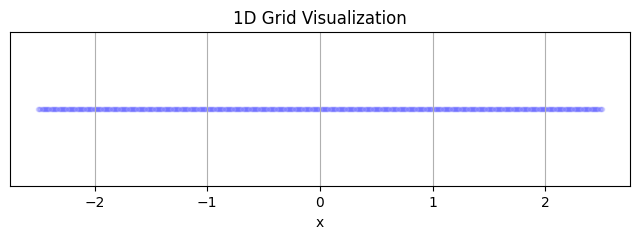

500

In [2]:
#-----------------------------------------------------------
# Characteristic lengths of the problem
#-----------------------------------------------------------
Lx = 5 # Characteristic length along x

#-----------------------------------------------------------
# Problem's parameters
#-----------------------------------------------------------
hbar = 1
m = 1 # e-mass

#-----------------------------------------------------------
# Simulation parameters
#-----------------------------------------------------------
xbounds = (-Lx/2, Lx/2) # 10 times the confinement length
dx = 0.01 # spacing
nx = int(np.abs(xbounds[1] - xbounds[0]) / dx)

#-----------------------------------------------------------
# Creating grid
#-----------------------------------------------------------
mesh_obj = Mesh(dims=1,
                 xbounds=xbounds,
                 nx=nx)

dimx = mesh_obj.Nx
mesh_obj.visualize_grid(alpha = 0.1)
dimx

In [3]:
#-----------------------------------------------------------
# Obtaining canonical operators
#-----------------------------------------------------------
operators = canonic_ops(mesh_obj, ops_to_compute=["p2"], additional_subspaces = None, hbar=hbar)
px2 = operators.get_ops()["p2"]

#-----------------------------------------------------------
# Constructing the Hamiltonian
#-----------------------------------------------------------
H = Hamiltonian(px2 / (2*m), mesh_obj)

In [4]:
k = 100
energies, wavefunctions = H.solve(k)

Solved eigenvalue problem.


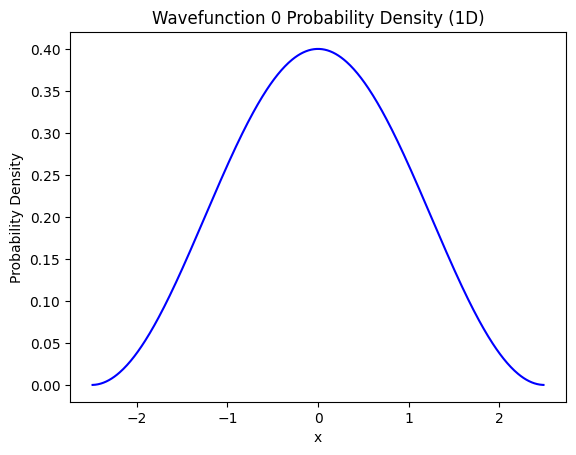

In [6]:
H.plot(0)

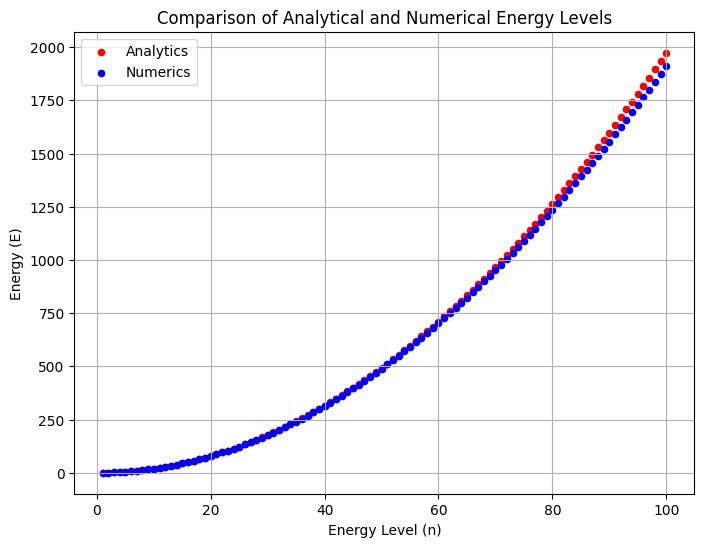

In [7]:
# Define the analytical energy function
def energy(n):
    return n**2 * np.pi**2 * hbar**2  / (2 * m * Lx**2)

# Generate analytical energy levels
analytical_energies = sorted([energy(n) for n in range(1,k+1)])

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(range(1,k+1), analytical_energies, c="r", s=20, label="Analytics")
plt.scatter(range(1,k+1), energies, c="b", s=20, label="Numerics")
plt.legend()
plt.ylabel("Energy (E)")
plt.xlabel("Energy Level (n)")
plt.title("Comparison of Analytical and Numerical Energy Levels")
plt.grid(True)

plt.show()